# **Step 1: Set Up the Environment**

In [98]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [99]:
# Load the datasets
file_paths = {
    "all_data_1": "all_data_1.csv",
    "all_data_2": "all_data_2.csv",
    "all_data_3": "all_data_3.csv",
    "all_data_4": "all_data_4.csv",
    "all_data_5": "all_data_5.csv",
    "all_data_6": "all_data_6.csv",
    "all_data_7": "all_data_7.csv",
    "all_data_8": "all_data_8.csv",
    "all_data_9": "all_data_9.csv",
    "all_data_10": "all_data_10.csv",
    "all_data_11": "all_data_11.csv",
    "all_data_12": "all_data_12.csv",
    "all_data_13": "all_data_13.csv",
    "all_data_14": "all_data_14.csv",
    "all_data_15": "all_data_15.csv",
    "all_data_16": "all_data_16.csv",
    "all_data_17": "all_data_17.csv",
    "all_data_18": "all_data_18.csv",
    "all_data_19": "all_data_19.csv",
    "all_data_20": "all_data_20.csv",
    "all_data_21": "all_data_21.csv",
    "all_data_22": "all_data_22.csv",
    "all_data_23": "all_data_23.csv",
    "all_data_24": "all_data_24.csv",
    "all_data_25": "all_data_25.csv",
    "all_data_26": "all_data_26.csv",
    "all_data_27": "all_data_27.csv",
    "all_data_28": "all_data_28.csv",
    "all_data_29": "all_data_29.csv",
    "all_data_30": "all_data_30.csv",
    "all_data_31": "all_data_31.csv",
    "all_data_32": "all_data_32.csv",
    "all_data_33": "all_data_33.csv",
    "all_data_34": "all_data_34.csv",
    "all_data_35": "all_data_35.csv",
    "all_data_36": "all_data_36.csv",
    "all_data_37": "all_data_37.csv",
    "all_data_38": "all_data_38.csv",
    "all_data_39": "all_data_39.csv",
    "all_data_40": "all_data_40.csv",
    "all_data_41": "all_data_41.csv",
    "all_data_42": "all_data_42.csv",
    "all_data_43": "all_data_43.csv",
    "all_data_44": "all_data_44.csv",
    "all_data_45": "all_data_45.csv",
    "all_data_46": "all_data_46.csv",
    "all_data_47": "all_data_47.csv",
    "all_data_48": "all_data_48.csv",
    "all_data_49": "all_data_49.csv",
    "all_data_50": "all_data_50.csv",
}

In [100]:
# Load the datasets into pandas DataFrames
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# **Step 2: Preprocessing**

❗❗❗ **Do not forget to change the sensor_columns (depends on the dataset)!** ❗❗❗

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [103]:
# Combine datasets
combined_data = pd.concat([datasets[f"all_data_{i}"] for i in range(1, 51)], ignore_index=True)

# Filter out noise
filtered_data = combined_data[combined_data["Letter"] != "noise"]

# Define sensor columns
sensor_columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Mag_X', 'Mag_Y', 'Mag_Z', 'Force']

# Normalize sensor data (Z-score normalization)
scaler = StandardScaler()
filtered_data[sensor_columns] = scaler.fit_transform(filtered_data[sensor_columns])

<ipython-input-103-87109f372068>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[sensor_columns] = scaler.fit_transform(filtered_data[sensor_columns])


In [104]:
# Function to group data into sequences by label
def create_sequences(data):
    sequences = []
    labels = []
    current_label = None
    current_sequence = []

    for _, row in data.iterrows():
        if row["Letter"] != current_label:
            # Save the current sequence if it's not empty
            if current_sequence:
                sequences.append(np.array(current_sequence))
                labels.append(current_label)
            # Start a new sequence
            current_label = row["Letter"]
            current_sequence = []

        # Append sensor values to the current sequence
        current_sequence.append(row[sensor_columns].values)

    # Save the final sequence
    if current_sequence:
        sequences.append(np.array(current_sequence))
        labels.append(current_label)

    return np.array(sequences, dtype=object), labels

In [105]:
# prompt: shape of sequences and labels

# Create sequences and labels
sequences, labels = create_sequences(filtered_data)

# Print the shapes
print("Sequences shape:", sequences.shape)
print("Labels shape:", len(labels))

for seq, label in zip(sequences, labels):
    print(f"Sequence Shape: {seq.shape}, Label: {label}")


Sequences shape: (3094,)
Labels shape: 3094
Sequence Shape: (20, 10), Label: A
Sequence Shape: (20, 10), Label: B
Sequence Shape: (16, 10), Label: C
Sequence Shape: (16, 10), Label: D
Sequence Shape: (15, 10), Label: E
Sequence Shape: (15, 10), Label: F
Sequence Shape: (14, 10), Label: G
Sequence Shape: (11, 10), Label: H
Sequence Shape: (10, 10), Label: I
Sequence Shape: (10, 10), Label: J
Sequence Shape: (10, 10), Label: K
Sequence Shape: (8, 10), Label: L
Sequence Shape: (11, 10), Label: M
Sequence Shape: (10, 10), Label: N
Sequence Shape: (11, 10), Label: O
Sequence Shape: (13, 10), Label: P
Sequence Shape: (12, 10), Label: Q
Sequence Shape: (11, 10), Label: R
Sequence Shape: (12, 10), Label: S
Sequence Shape: (12, 10), Label: T
Sequence Shape: (16, 10), Label: U
Sequence Shape: (18, 10), Label: V
Sequence Shape: (19, 10), Label: W
Sequence Shape: (14, 10), Label: X
Sequence Shape: (15, 10), Label: Y
Sequence Shape: (17, 10), Label: Z
Sequence Shape: (8, 10), Label: a
Sequence Shap

In [106]:
from tensorflow.keras import layers

# Create sequences and labels
sequences, labels = create_sequences(filtered_data)

# Map labels to integer indices
unique_labels = list(set(labels))
max_label_length = max([len(label) for label in unique_labels])
characters = set(char for label in unique_labels for char in label)

# Define a blank token (typically represented as an empty string or a special character)
blank_token = '-'

# Update the StringLookup layers with the extended vocabulary
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None, oov_token=blank_token
)

num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

# Map labels to integer indices, including the blank token where needed
labels = [char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8")) for label in labels]

# Verify the vocabulary including the blank index
print(f"Vocabulary: {char_to_num.get_vocabulary()}")
print(f"Blank token index: {char_to_num(blank_token).numpy()}")

# Pad the labels with a safe padding value, e.g., -1
padded_labels = pad_sequences(labels, maxlen=max_label_length, padding='post', value=-1)

# Convert to a TensorFlow tensor and replace -1 with the CTC blank index (0)
padded_labels = tf.where(padded_labels == -1, tf.cast(0, tf.int32), tf.convert_to_tensor(padded_labels, dtype=tf.int32))

print(f"Padded Labels Shape: {padded_labels.shape}")  # Expected: (batch_size, max_label_length)

Vocabulary: ['-', 'Y', 'Q', 'O', 'u', 'Z', '1', 'D', '6', 'f', 'o', 'T', 'N', '7', 'y', 'C', 'B', 'E', 'v', 'P', 'J', 'F', 'j', 'W', 's', 'A', 'U', 'd', 'z', '8', 'c', 'g', 'p', 'G', 'l', 'M', '5', '2', 'q', 'e', 'I', '9', 'm', 'K', 'L', 'S', 'h', 'r', 'k', 'i', 'a', 'x', 't', 'w', '0', 'V', 'R', 'n', '4', 'X', '3', 'H', 'b']
Blank token index: 0
Padded Labels Shape: (3094, 1)


In [107]:
print(max_label_length)

1


In [108]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define padding parameters
max_length = max([len(seq) for seq in sequences])  # Longest sequence
min_length = 0  # Minimum acceptable length for sequences

# Filter out very short sequences
filtered_sequences = [seq for seq in sequences if seq.shape[0] >= min_length]
filtered_labels = [label for seq, label in zip(sequences, padded_labels) if seq.shape[0] >= min_length]

# Pad sequences to the same length
padded_sequences = pad_sequences(filtered_sequences, maxlen=max_length, padding='post', dtype='float32', value=0)

# Verify the new shapes
print(f"Padded Sequences Shape: {padded_sequences.shape}")
print(f"Filtered Labels Count: {len(filtered_labels)}")

print("Max length: ", max_length)


Padded Sequences Shape: (3094, 48, 10)
Filtered Labels Count: 3094
Max length:  48


In [109]:
import tensorflow as tf
import random

def split_data(sequences, labels, train_size=0.7, shuffle=True):
    # Get dataset size
    size = tf.shape(sequences)[0].numpy()  # Get number of sequences

    # Create indices using TensorFlow's range
    indices = list(range(size))  # Using Python list to avoid TensorFlow slicing issues

    if shuffle:
        random.shuffle(indices)  # Shuffle indices in-place using Python

    # Calculate training set size
    train_samples = int(size * train_size)

    # Convert indices to TensorFlow tensors for tensor slicing
    train_idx = tf.convert_to_tensor(indices[:train_samples])
    valid_idx = tf.convert_to_tensor(indices[train_samples:])

    # Slice sequences properly using TensorFlow
    x_train = tf.gather(sequences, train_idx)
    x_valid = tf.gather(sequences, valid_idx)

    # Slice labels (which are lists of tensors) using Python indexing
    y_train = [labels[i] for i in indices[:train_samples]]
    y_valid = [labels[i] for i in indices[train_samples:]]

    return x_train, x_valid, y_train, y_valid

# Ensure padded_sequences is a TensorFlow tensor
padded_sequences_tensor = tf.convert_to_tensor(padded_sequences)

# Apply the fixed split_data function
X_train, X_test, y_train, y_test = split_data(padded_sequences_tensor, filtered_labels)

# Check types to confirm they remain unchanged
print(type(X_train), type(y_train))  # Expected: (tensorflow.Tensor, list)
print(type(X_test), type(y_test))    # Expected: (tensorflow.Tensor, list)


<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'list'>


In [110]:
for seq, label in zip(padded_sequences, filtered_labels):
    print(f"Sequence Shape: {seq.shape}, Label: {label}")

Sequence Shape: (48, 10), Label: [25]
Sequence Shape: (48, 10), Label: [16]
Sequence Shape: (48, 10), Label: [15]
Sequence Shape: (48, 10), Label: [7]
Sequence Shape: (48, 10), Label: [17]
Sequence Shape: (48, 10), Label: [21]
Sequence Shape: (48, 10), Label: [33]
Sequence Shape: (48, 10), Label: [61]
Sequence Shape: (48, 10), Label: [40]
Sequence Shape: (48, 10), Label: [20]
Sequence Shape: (48, 10), Label: [43]
Sequence Shape: (48, 10), Label: [44]
Sequence Shape: (48, 10), Label: [35]
Sequence Shape: (48, 10), Label: [12]
Sequence Shape: (48, 10), Label: [3]
Sequence Shape: (48, 10), Label: [19]
Sequence Shape: (48, 10), Label: [2]
Sequence Shape: (48, 10), Label: [56]
Sequence Shape: (48, 10), Label: [45]
Sequence Shape: (48, 10), Label: [11]
Sequence Shape: (48, 10), Label: [26]
Sequence Shape: (48, 10), Label: [55]
Sequence Shape: (48, 10), Label: [23]
Sequence Shape: (48, 10), Label: [59]
Sequence Shape: (48, 10), Label: [1]
Sequence Shape: (48, 10), Label: [5]
Sequence Shape: (

In [111]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {len(y_train)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {len(y_test)}")

X_train shape: (2165, 48, 10)
y_train shape: 2165
X_test shape: (929, 48, 10)
y_test shape: 929


In [112]:
# Print the first few for each
for (x,y) in zip(X_train, y_train):
    print(f"X: {x}, Y: {y}")


Streaming output truncated to the last 5000 lines.
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.        

# **Step 3: CNN Model Design**







In [113]:
from tensorflow import keras
from tensorflow.keras import layers, models

def build_ctc_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv1D(1024, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        layers.Conv1D(512, kernel_size=3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        layers.Conv1D(256, kernel_size=3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        layers.Conv1D(128, kernel_size=3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        # Dense layer without softmax, to provide logits
        layers.Dense(num_classes)
    ])
    return model

# Define input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
num_classes = len(char_to_num.get_vocabulary()) + 1  # Including the CTC blank token

# Build the CNN model
ctc_cnn_model = build_ctc_cnn_model(input_shape, num_classes)

In [114]:
# Define input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
num_classes = len(char_to_num.get_vocabulary()) + 1  # Including the CTC blank token

print("Input shape:", input_shape)
print("Number of classes:", num_classes)
print("Vocabulary size:", len(char_to_num.get_vocabulary()))
print("Blank token index:", char_to_num(blank_token).numpy())
print("Vocabulary:", char_to_num.get_vocabulary())

Input shape: (48, 10)
Number of classes: 64
Vocabulary size: 63
Blank token index: 0
Vocabulary: ['-', 'Y', 'Q', 'O', 'u', 'Z', '1', 'D', '6', 'f', 'o', 'T', 'N', '7', 'y', 'C', 'B', 'E', 'v', 'P', 'J', 'F', 'j', 'W', 's', 'A', 'U', 'd', 'z', '8', 'c', 'g', 'p', 'G', 'l', 'M', '5', '2', 'q', 'e', 'I', '9', 'm', 'K', 'L', 'S', 'h', 'r', 'k', 'i', 'a', 'x', 't', 'w', '0', 'V', 'R', 'n', '4', 'X', '3', 'H', 'b']


In [115]:
# Build the CNN model
ctc_cnn_model = build_ctc_cnn_model(input_shape, num_classes)

# Display the model summary to verify the architecture
ctc_cnn_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_43 (Conv1D)                   │ (None, 48, 1024)            │          52,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 48, 1024)            │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_43 (MaxPooling1D)      │ (None, 24, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 24, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_44 (Conv1D)                   │ (None, 24, 512)             │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 24, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_44 (MaxPooling1D)      │ (None, 12, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 12, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_45 (Conv1D)                   │ (None, 12, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 12, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_45 (MaxPooling1D)      │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 6, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_46 (Conv1D)                   │ (None, 6, 128)              │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 6, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_46 (MaxPooling1D)      │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3, 64)               │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,133,440 (8.14 MB)

 Trainable params: 2,129,600 (8.12 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [116]:
def ctc_loss(y_true, y_pred):
    # Transpose y_pred if using logits_time_major=True (to [max_time, batch_size, num_classes])
    y_pred = tf.transpose(y_pred, [1, 0, 2])

    # Ensure y_true is of type int32 (or another allowed type)
    y_true = tf.cast(y_true, tf.int32)  # Cast to int32

    # Calculate input length (logit length) and label length
    logit_length = tf.fill([tf.shape(y_pred)[1]], tf.shape(y_pred)[0])  # shape: (batch_size,)
    label_length = tf.reduce_sum(tf.cast(tf.not_equal(y_true, 0), tf.int32), axis=1)  # shape: (batch_size,)

    # Compute the CTC loss using tf.nn.ctc_loss
    loss = tf.nn.ctc_loss(
        labels=y_true,
        logits=y_pred,
        label_length=label_length,
        logit_length=logit_length,
        logits_time_major=True,
        blank_index=0
    )

    # Debugging shapes
    print("y_true shape:", y_true.shape)
    print("y_pred shape:", y_pred.shape)
    print("logit_length shape:", logit_length.shape)
    print("label_length shape:", label_length.shape)

    return loss

In [117]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# Compile the model with CTC loss
ctc_cnn_model.compile(optimizer='adam', loss=ctc_loss)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [118]:
# Prepare the data with the correctly padded labels
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes before training
for x_batch, y_batch in train_data.take(1):
    print("Batch X shape:", x_batch.shape)  # Expected: (batch_size, time_steps, features)
    print("Batch Y shape:", y_batch.shape)  # Expected: (batch_size, max_label_length)


Batch X shape: (32, 48, 10)
Batch Y shape: (32, 1)


In [119]:
# Train the model
cnn_history = ctc_cnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping]
)

Epoch 1/500
y_true shape: (None, 1)
y_pred shape: (3, None, 64)
logit_length shape: (None,)
label_length shape: (None,)
y_true shape: (None, 1)
y_pred shape: (3, None, 64)
logit_length shape: (None,)
label_length shape: (None,)
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 6.4046y_true shape: (None, 1)
y_pred shape: (3, None, 64)
logit_length shape: (None,)
label_length shape: (None,)
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - loss: 6.3866 - val_loss: 5.0730
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3829 - val_loss: 6.1076
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3101 - val_loss: 5.2346
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2589 - val_loss: 4.8253
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2458 - val_loss: 4.4341
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1862 - val_loss: 4.2956
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2210 - val_loss: 4.2378
Epoch 8/500
68/68 ━━━━━

# **Step 4: CNN Prediction**







In [120]:
# Generate raw predictions (logits) from the model
logits = ctc_cnn_model.predict(X_test)

print(f"Logits shape: {logits.shape}")  # Expected shape: (batch_size, time_steps, num_classes)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Logits shape: (929, 3, 64)


In [121]:
# Use CTC greedy decoder to convert logits to sequences
decoded_predictions, _ = tf.nn.ctc_greedy_decoder(
    tf.transpose(logits, [1, 0, 2]),  # Transpose for time-major format
    tf.fill([tf.shape(logits)[0]], tf.shape(logits)[1])  # Input length
)

# Convert the sparse tensor to dense format
dense_predictions = tf.sparse.to_dense(decoded_predictions[0], default_value=0)

# Convert from numeric indices to characters using `num_to_char` mapping
predicted_texts = [
    ''.join(num_to_char(index).numpy().decode('utf-8') for index in prediction if index > 0)
    for prediction in dense_predictions
]

# Display a few predictions
for i, pred in enumerate(predicted_texts[:5]):
    print(f"Prediction {i+1}: {pred}")

Prediction 1: n
Prediction 2: n
Prediction 3: n
Prediction 4: n
Prediction 5: n


In [122]:
# Convert y_test (true labels) back to readable text
true_texts = [
    ''.join(num_to_char(index).numpy().decode('utf-8') for index in label if index > 0)
    for label in y_test
]

# Display a few comparisons
for i in range(5):
    print(f"True: {true_texts[i]} | Predicted: {predicted_texts[i]}")

True: J | Predicted: n
True: N | Predicted: n
True: u | Predicted: n
True: 4 | Predicted: n
True: o | Predicted: n


In [123]:
# Calculate accuracy or another relevant metric
from sklearn.metrics import accuracy_score

# Since we are working with sequences, a simple accuracy score might not be sufficient.
# You might consider a character-level or sequence-level accuracy.
sequence_accuracy = sum([1 for true, pred in zip(true_texts, predicted_texts) if true == pred]) / len(true_texts)

print(f"Sequence Accuracy: {sequence_accuracy * 100:.2f}%")

Sequence Accuracy: 1.18%


# **Step 3*: CLDNN Model Design**







In [124]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the CLDNN Model without softmax
def create_cldnn_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape, name='input')

    # Convolutional Layers
    x = layers.Conv1D(512, 5, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(256, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    # LSTM Layers
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='tanh'))(x)
    x = layers.Dropout(0.3)(x)

    # Fully Connected Layer
    x = layers.Dense(100, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Linear Output Layer (No activation function)
    outputs = layers.Dense(num_classes)(x)

    # Define the model
    model = models.Model(inputs, outputs, name='CLDNN_Model')
    return model

# Input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
num_classes = len(char_to_num.get_vocabulary()) + 1  # Include the blank token (0 index)

# Create the CLDNN model
cldnn_model = create_cldnn_model(input_shape, num_classes)

# Compile the model with CTC loss
cldnn_model.compile(optimizer='adam', loss=ctc_loss)

# Display model summary
cldnn_model.summary()

Model: "CLDNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 48, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_47 (Conv1D)                   │ (None, 48, 512)             │          26,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 48, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_47 (MaxPooling1D)      │ (None, 24, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 24, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_48 (Conv1D)                   │ (None, 24, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 24, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_48 (MaxPooling1D)      │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_49 (Conv1D)                   │ (None, 12, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 12, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_49 (MaxPooling1D)      │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 6, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 6, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6, 100)              │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 6, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 6, 64)               │           6,4

 Total params: 738,596 (2.82 MB)

 Trainable params: 736,804 (2.81 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [125]:
# Train the model
cldnn_history = cldnn_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=500,
    callbacks=[early_stopping]
)

Epoch 1/500
y_true shape: (None, 1)
y_pred shape: (6, None, 64)
logit_length shape: (None,)
label_length shape: (None,)
y_true shape: (None, 1)
y_pred shape: (6, None, 64)
logit_length shape: (None,)
label_length shape: (None,)
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.4808y_true shape: (None, 1)
y_pred shape: (6, None, 64)
logit_length shape: (None,)
label_length shape: (None,)
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 11.3580 - val_loss: 5.7519
Epoch 2/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.4478 - val_loss: 12.0482
Epoch 3/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.1792 - val_loss: 8.3419
Epoch 4/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.1557 - val_loss: 4.6524
Epoch 5/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.1514 - val_loss: 4.5417
Epoch 6/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.1357 - val_loss: 4.1823
Epoch 7/500
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.1267 - val_loss: 4.1062
Epoch 8/500
68/68

# **Step 4*: CLDNN Prediction**

In [126]:
# Generate predictions using the CLDNN model
logits = cldnn_model.predict(X_test)

# Decode predictions using CTC greedy decoder
decoded_predictions, _ = tf.nn.ctc_greedy_decoder(
    tf.transpose(logits, [1, 0, 2]),  # Transpose for time-major format
    tf.fill([tf.shape(logits)[0]], tf.shape(logits)[1])  # Input length
)

# Convert the sparse tensor to dense format
dense_predictions = tf.sparse.to_dense(decoded_predictions[0], default_value=0)

# Convert from numeric indices to characters using `num_to_char` mapping
predicted_texts = [
    ''.join(num_to_char(index).numpy().decode('utf-8') for index in prediction if index > 0)
    for prediction in dense_predictions
]

# Display a few predictions
for i, pred in enumerate(predicted_texts[:5]):
    print(f"Prediction {i+1}: {pred}")

# Compare predictions with ground truth
true_texts = [
    ''.join(num_to_char(index).numpy().decode('utf-8') for index in label if index > 0)
    for label in y_test
]

# Display a few comparisons
for i in range(5):
    print(f"True: {true_texts[i]} | Predicted: {predicted_texts[i]}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Prediction 1: J
Prediction 2: N
Prediction 3: 5
Prediction 4: 4
Prediction 5: X
True: J | Predicted: J
True: N | Predicted: N
True: u | Predicted: 5
True: 4 | Predicted: 4
True: o | Predicted: X


# **Step 5: Plots**







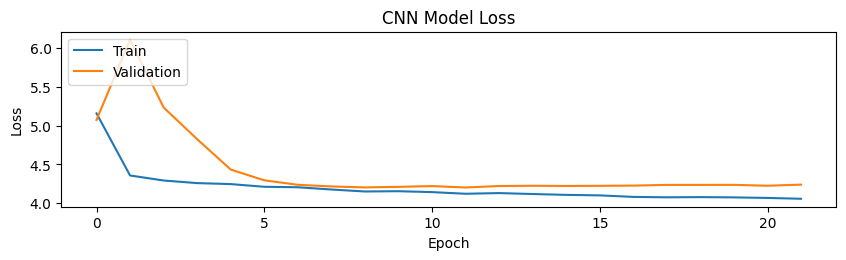

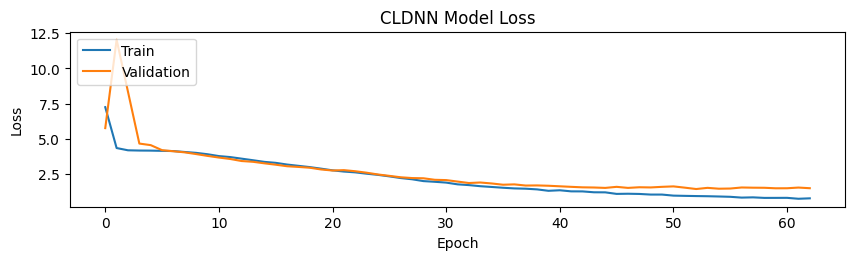

In [130]:
# prompt: generate training and validation plots for both models

import matplotlib.pyplot as plt

# CNN model
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# CLDNN model
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 2)
plt.plot(cldnn_history.history['loss'])
plt.plot(cldnn_history.history['val_loss'])
plt.title('CLDNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
